In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import preprocessing, neighbors, grid_search, linear_model, cross_validation

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv(os.path.join('..', 'datasets', 'abalone.csv'))

In [3]:
df

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
df.corr()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
WholeWeight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
ShuckedWeight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
VisceraWeight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
ShellWeight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [5]:
df.var()

Length            0.014422
Diameter          0.009849
Height            0.001750
WholeWeight       0.240481
ShuckedWeight     0.049268
VisceraWeight     0.012015
ShellWeight       0.019377
Rings            10.395266
dtype: float64

In [6]:
X = df.drop('Sex', axis= 1)

In [7]:
X

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [8]:
y = df.Sex

In [9]:
y

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, dtype: object

In [10]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)

In [11]:
print len (X_train)
print len (X_test)
print len (y_train)
print len (y_test)

2506
1671
2506
1671


In [12]:
X_train.corr()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
Length,1.000000,0.986210,0.786037,0.924926,0.897901,0.903922,0.892332,0.556898
Diameter,0.986210,1.000000,0.792932,0.925333,0.893088,0.900748,0.900939,0.575378
Height,0.786037,0.792932,1.000000,0.778012,0.738687,0.758688,0.770864,0.520436
WholeWeight,0.924926,0.925333,0.778012,1.000000,0.967642,0.966624,0.951537,0.543409
ShuckedWeight,0.897901,0.893088,0.738687,0.967642,1.000000,0.931277,0.874083,0.417945
VisceraWeight,0.903922,0.900748,0.758688,0.966624,0.931277,1.000000,0.903908,0.505877
ShellWeight,0.892332,0.900939,0.770864,0.951537,0.874083,0.903908,1.000000,0.635573
Rings,0.556898,0.575378,0.520436,0.543409,0.417945,0.505877,0.635573,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11834a8d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e3b7490>]], dtype=object)

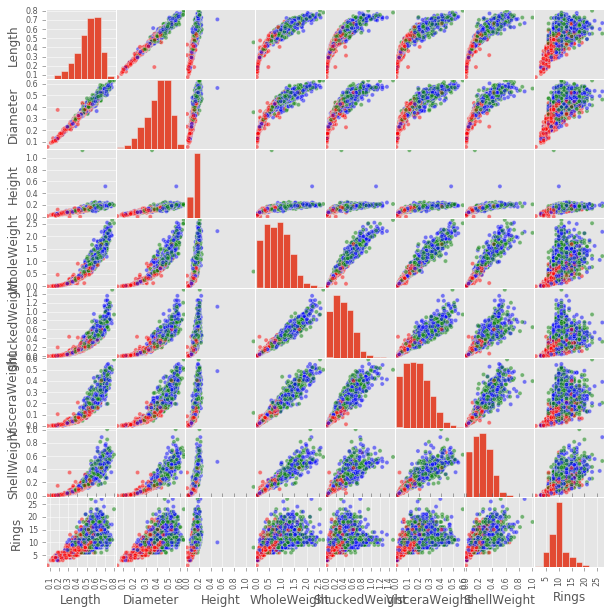

In [13]:
color_wheel = {"I": "red", 
               "M": "blue", 
               "F": "green"}
color = y_train.map(color_wheel)
pd.tools.plotting.scatter_matrix(X_train[['Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight','Rings']], c=color, s=70, figsize = (10,10))

In [14]:
color = df.Sex.map({'I': 'red', 'F': 'green', 'M': 'blue'})

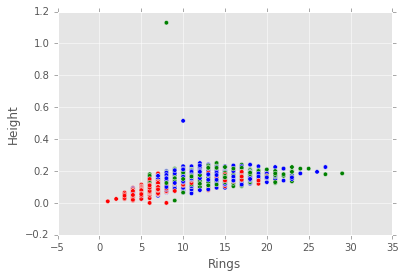

In [15]:
df.plot(x = 'Rings', y = 'Height', kind = 'scatter', c = color)

In [16]:
feature = X_train[['Height', 'Length','Rings', 'WholeWeight' ]]
c = y_train
model = linear_model.LogisticRegression().\
    fit(feature, c)

In [17]:
model.score(feature, c)
# to check the model accuracy 

0.54309656823623309

In [18]:
c_hat = model.predict(feature)
 
pd.crosstab(c_hat, c,
   rownames = ['Hypothesized Class'],
   colnames = ['True Class'])

True Class,F,I,M
Hypothesized Class,,,
F,10,1,14
I,129,657,221
M,637,143,694


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fcc6e50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x120ccd250>]], dtype=object)

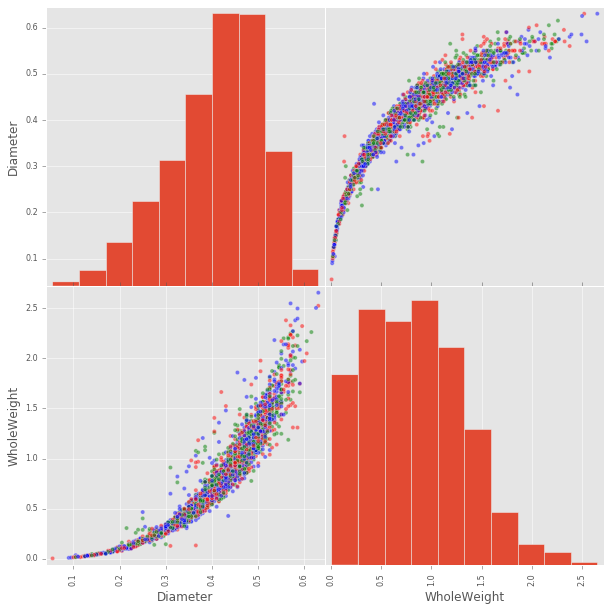

In [19]:
pd.tools.plotting.scatter_matrix(X_train[['Diameter', 'WholeWeight']], c=color, s=70, figsize = (10,10))

In [20]:
df.WholeWeight < df.ShuckedWeight

0       False
1       False
2       False
3       False
4       False
        ...  
4172    False
4173    False
4174    False
4175    False
4176    False
dtype: bool

In [21]:
(df.WholeWeight < df.ShuckedWeight).sum()

4

In [22]:
(df.WholeWeight < df.ShellWeight).sum()

1

In [23]:
df.WholeWeight + df.ShuckedWeight + df.VisceraWeight + df.ShellWeight

0       0.9895
1       0.4435
2       1.2850
3       1.0005
4       0.3890
         ...  
4172    1.7450
4173    1.8800
4174    2.2970
4175    2.1825
4176    3.7655
dtype: float64

In [24]:
df.WholeWeight < df.ShuckedWeight + df.VisceraWeight + df.ShellWeight

0       False
1       False
2       False
3       False
4       False
        ...  
4172    False
4173    False
4174    False
4175    False
4176    False
dtype: bool

In [25]:
df['Volume'] = 3.1415 * (df.Length/2) * (df.Diameter/2) * df.Height

In [26]:
df.Volume

0       0.012391
1       0.006556
2       0.023601
3       0.015766
4       0.005287
          ...   
4172    0.032947
4173    0.027524
4174    0.045886
4175    0.035710
4176    0.060348
Name: Volume, dtype: float64

In [27]:
df['Volume'] = df.Length * df.Diameter * df.Height * np.pi/4

In [28]:
df['Density'] = (df.WholeWeight)/(df.Volume)

In [29]:
df.Density

0       41.480633
1       34.395390
2       28.684010
3       32.726855
4       38.772149
          ...    
4172    26.920854
4173    35.095286
4174    25.628236
4175    30.648757
4176    32.286769
Name: Density, dtype: float64

In [30]:
df

,Sex,Length,Diameter,Height,WholeWeight,...,VisceraWeight,ShellWeight,Rings,Volume,Density
0,M,0.455,0.365,0.095,0.5140,...,0.1010,0.1500,15,0.012391,41.480633
1,M,0.350,0.265,0.090,0.2255,...,0.0485,0.0700,7,0.006556,34.395390
2,F,0.530,0.420,0.135,0.6770,...,0.1415,0.2100,9,0.023602,28.684010
3,M,0.440,0.365,0.125,0.5160,...,0.1140,0.1550,10,0.015767,32.726855
4,I,0.330,0.255,0.080,0.2050,...,0.0395,0.0550,7,0.005287,38.772149
...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,...,0.2390,0.2490,11,0.032948,26.920854
4173,M,0.590,0.440,0.135,0.9660,...,0.2145,0.2605,10,0.027525,35.095286
4174,M,0.600,0.475,0.205,1.1760,...,0.2875,0.3080,9,0.045887,25.628236
4175,F,0.625,0.485,0.150,1.0945,...,0.2610,0.2960,10,0.035711,30.648757


In [31]:
df.drop(df[df.Volume == 0].index, inplace = True)
#df=df[df.Volume > 0] it does the same thing

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120baff10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x121f51c10>]], dtype=object)

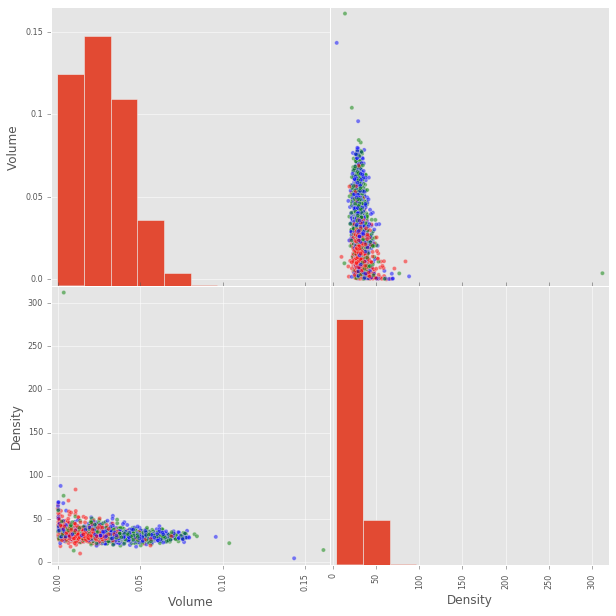

In [32]:
pd.tools.plotting.scatter_matrix(df[['Volume', 'Density']], c=color, s=70, figsize = (10,10))

In [33]:
# conclusion: the parameters are not enough to separate among infant, female & male

In [34]:
# since linear regression didn't work, we will use logistic regression -kNN

In [35]:
X = df[['Rings', 'Volume', 'Density']]
c = df.Sex
train_X, test_X, train_c, test_c = cross_validation.train_test_split(X, c, train_size=0.6, random_state=0)

#always just do fit on the training set instead of the test_x
scaler = preprocessing.MinMaxScaler().fit(train_X)
train_X = scaler.transform(train_X)

In [37]:
model = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform').\
    fit(X, c)
    # value of K. low value of K it overfit

In [38]:
c_hat = model.predict(X)

In [39]:
(c_hat != c).sum()

1506

In [ ]:
#Try Random Forest